In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


### Read and load Dataset1

In [3]:
dataset=pd.read_excel('DataSet1.xlsx')
dataset.head()

,"""Date"",""Temp"""
0,"""1981-01-01"",20.7"
1,"""1981-01-02"",17.9"
2,"""1981-01-03"",18.8"
3,"""1981-01-04"",14.6"
4,"""1981-01-05"",15.8"


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 1 columns):
"Date","Temp"    3650 non-null object
dtypes: object(1)
memory usage: 28.6+ KB


### spliting Column into two columns Date and Temp

In [5]:
new = dataset['"Date","Temp"'].str.split(",", n = 1, expand = True)

In [6]:
dataset['Date']=new[0]
dataset['Temp']=new[1]

### Drop Unwanted column

In [7]:
dataset.drop(columns=['"Date","Temp"'],inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date    3650 non-null object
Temp    3650 non-null object
dtypes: object(2)
memory usage: 57.2+ KB


### Covert Temp Datatype from String to Integer

In [9]:
dataset['Temp']=pd.to_numeric(dataset['Temp'])

ValueError: Unable to parse string " "1986-02-04"" at position 1859

In [10]:
#we found  invalid Temp and Date so We try to swap between them
dataset['Temp'].iloc[1859]

' "1986-02-04"'

In [11]:
dataset['Date'].iloc[1859]

'11.6'

In [12]:
#Swapping
dat=dataset['Temp'].iloc[1859]
temp=dataset['Date'].iloc[1859]
dataset['Temp'].iloc[1859]=temp
dataset['Date'].iloc[1859]=dat

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
Date    3650 non-null object
Temp    3650 non-null object
dtypes: object(2)
memory usage: 57.2+ KB


## Converting Date Datatype from String To DateTime

In [14]:
# Remove "" from date
dataset['Date']=dataset['Date'].str.replace('\"','')

In [15]:
#split Date to Check if there is error in monthes and year
dataset[['Year','Month','Day']] = dataset.Date.str.split("-",expand=True)
dataset.drop(['Date'], axis=1)
dataset=dataset[['Year','Month','Day','Temp']]

In [16]:
dataset['Year'] =  pd.to_numeric(dataset['Year'])
dataset['Month'] = pd.to_numeric(dataset['Month'])
dataset['Day'] = pd.to_numeric(dataset['Day'])
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 4 columns):
Year     3650 non-null int64
Month    3649 non-null float64
Day      3649 non-null float64
Temp     3650 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 114.2+ KB


In [17]:
#check in month
Index=0
for Mon in dataset['Month']:
    if Mon>12:
        print("There is error in Index ",Index)
    else: print('There is no Error')    
    Index+=1    

There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is n

There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is n

There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is no Error
There is n

In [18]:
#check in Day
Index=0
for Day in dataset['Day']:
    if Day>31:
        print("There is error in Index %d",Index)   
    Index+=1  

In [19]:
dataset.iloc[980]

Year     1983
Month      33
Day         8
Temp     12.2
Name: 980, dtype: object

In [20]:
dataset.drop(index=[980],inplace=True)

In [21]:
#Drop NAN Value
dataset.dropna(how='any',inplace=True)

In [22]:
dataset.head()


,Year,Month,Day,Temp
0,1981,1.0,1.0,20.7
1,1981,1.0,2.0,17.9
2,1981,1.0,3.0,18.8
3,1981,1.0,4.0,14.6
4,1981,1.0,5.0,15.8


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 3649
Data columns (total 4 columns):
Year     3648 non-null int64
Month    3648 non-null float64
Day      3648 non-null float64
Temp     3648 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 142.5+ KB


In [24]:
#convert DAte to Datetime
dataset['Date']=pd.to_datetime(dataset.Year*10000+dataset.Month*100+dataset.Day,format='%Y%m%d')
dataset=dataset[['Date','Temp']]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 3649
Data columns (total 2 columns):
Date    3648 non-null datetime64[ns]
Temp    3648 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 85.5+ KB


In [25]:
dataset.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [26]:
#check For Duplicated
dataset.duplicated().sum()

0

In [27]:
#extract new Cleaned Data in CSV
dataset.to_csv('Dataset1_Cleaned.csv',index=False)

No handles with labels found to put in legend.


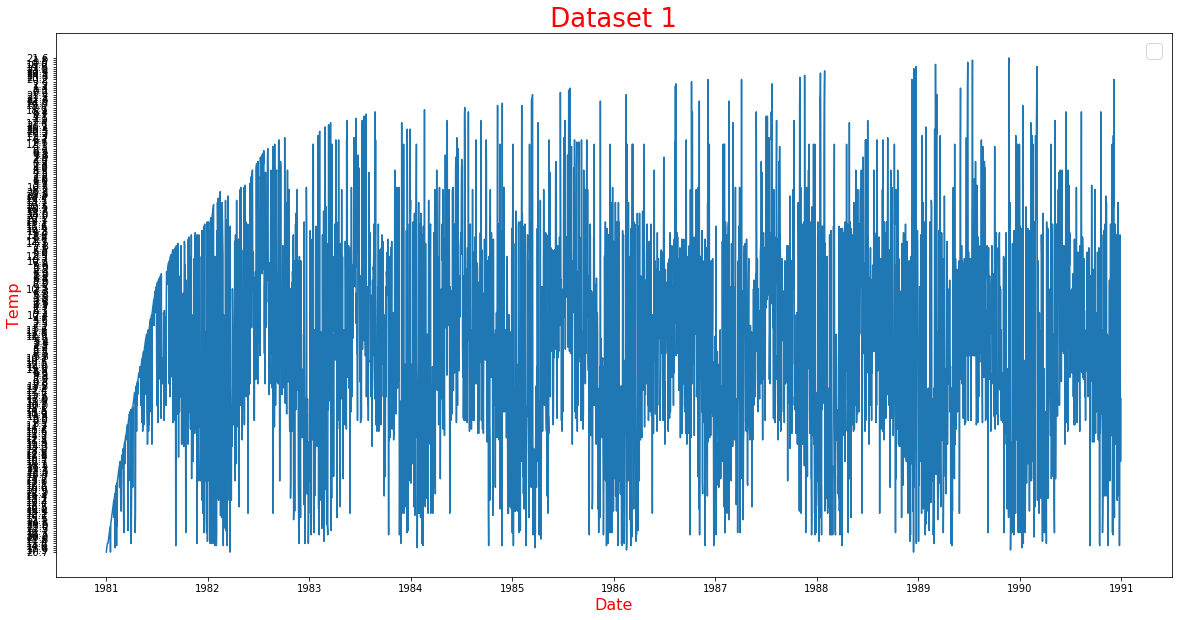

In [46]:
plt.figure(figsize=(20,10))
plt.plot(dataset['Date'],dataset['Temp'] )
plt.title(' Dataset 1 ',color='red',fontsize=26)
plt.xlabel('Date',color='red',fontsize=16)     
plt.ylabel('Temp',color='red',fontsize=16)  

plt.legend(prop={'size': 20})
plt.show()   

TypeError: no numeric data to plot